# K Means

## Importing Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset 

In [17]:
# Reading the dataset
X = pd.read_csv("./datasets/kmeans.csv")
X1 = X['x1']
X2 = X['x2']

# Normalizing the dataset
X1 = (X1-X1.mean())/X1.std()
X2 = (X2-X2.mean())/X2.std()

X = np.column_stack((X1, X2))


## Plotting Given Data

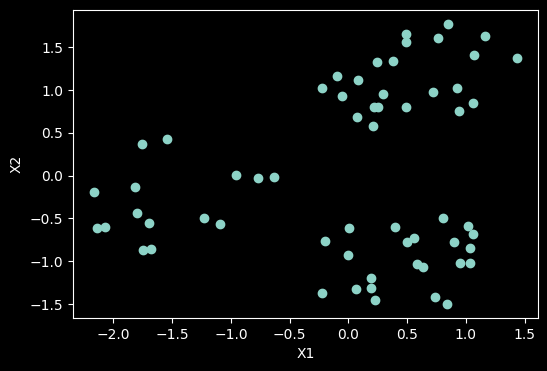

In [18]:
# Plotting the normalized dataset
plt.figure(figsize=(6, 4))
    
plt.style.use('dark_background')
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(X1, X2)
plt.show()

## Training Function for K-Means

In [19]:
eps = 1e-4

def training_function(k, iters, tol=eps):
    np.random.seed(10)
    C = np.random.random((k, 2))
    for iteration in range(iters): 
        prev_C = C.copy()
        clusters = []
        
        for i in range(len(X)): 
            distances = []
            for j in range(k): 
                dist = np.sqrt((C[j][0] - X1[i])**2 + (C[j][1] - X2[i])**2) 
                distances.append(dist)
            clusters.append(np.argmin(distances))
        
        for i in range(k): 
            points = X[np.array(clusters) == i]
            C[i] = np.mean(points, axis = 0)

        diff = np.sum((C - prev_C)**2)
        if diff < tol:
            print(f"Converged after {iteration+1} iterations")
            return clusters

## Training K-Means for K = 2

In [20]:
final_clusters = training_function(k=2, iters=50)

Converged after 3 iterations


## Plotting Clusters (K=2)

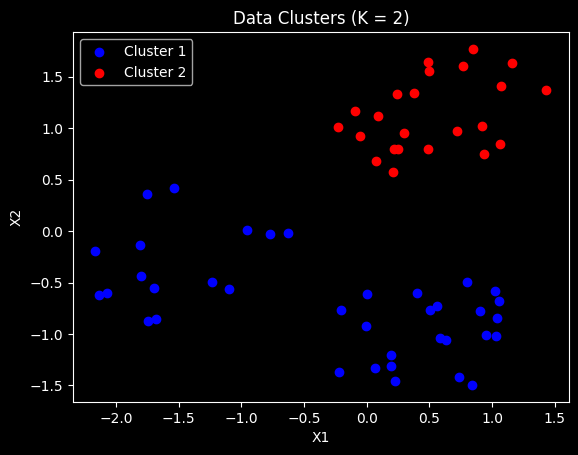

In [21]:
# Plotting the clustered dataset 
points = X[np.array(final_clusters) == 0] 
plt.scatter(points[:, 0], points[:, 1], color='b', label='Cluster 1')

points = X[np.array(final_clusters) == 1]
plt.scatter(points[:, 0], points[:, 1], color='r', label='Cluster 2')

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Data Clusters (K = 2)")
plt.legend()
plt.show()

## Training K-Means for K = 3

In [22]:
final_clusters = training_function(k=3, iters=50)

Converged after 3 iterations


## Plotting Clusters (K=3)

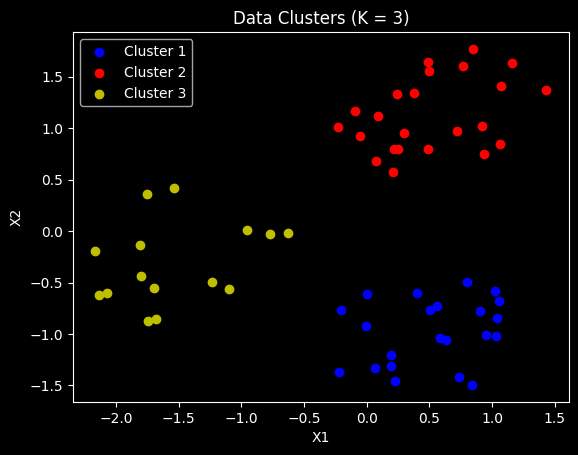

In [23]:
# Plotting the clustered dataset 
points = X[np.array(final_clusters) == 0] 
plt.scatter(points[:, 0], points[:, 1], color='b', label='Cluster 1')

points = X[np.array(final_clusters) == 1]
plt.scatter(points[:, 0], points[:, 1], color='r', label='Cluster 2')

points = X[np.array(final_clusters) == 2]
plt.scatter(points[:, 0], points[:, 1], color='y', label='Cluster 3')

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Data Clusters (K = 3)")
plt.legend()
plt.show()